# Read Database

La estación meteorológica exporta los datos en una base de datos `sqLite3`

In [6]:
import sqlite3
conn = sqlite3.connect('weewx.sdb')
c = conn.cursor()

In [7]:
#### Averiguo las DataBases en el archivo
c.execute('PRAGMA database_list')
databases = c.fetchall()
for item in databases:
    print(item[0],item[1])
## Parece que siempre aparece la DB 'main'

0 main


In [8]:
#### Averiguo las tablas
c.execute('SELECT name FROM sqlite_master WHERE type = "table"')
tables = c.fetchall()
for item in tables:
    print(item[0])

archive
archive_day_barometer
archive_day_pressure
archive_day_altimeter
archive_day_inTemp
archive_day_outTemp
archive_day_inHumidity
archive_day_outHumidity
archive_day_windSpeed
archive_day_windDir
archive_day_windGust
archive_day_windGustDir
archive_day_rainRate
archive_day_rain
archive_day_dewpoint
archive_day_windchill
archive_day_heatindex
archive_day_ET
archive_day_radiation
archive_day_UV
archive_day_extraTemp1
archive_day_extraTemp2
archive_day_extraTemp3
archive_day_soilTemp1
archive_day_soilTemp2
archive_day_soilTemp3
archive_day_soilTemp4
archive_day_leafTemp1
archive_day_leafTemp2
archive_day_extraHumid1
archive_day_extraHumid2
archive_day_soilMoist1
archive_day_soilMoist2
archive_day_soilMoist3
archive_day_soilMoist4
archive_day_leafWet1
archive_day_leafWet2
archive_day_rxCheckPercent
archive_day_txBatteryStatus
archive_day_consBatteryVoltage
archive_day_hail
archive_day_hailRate
archive_day_heatingTemp
archive_day_heatingVoltage
archive_day_supplyVoltage
archive_day_ref

In [9]:
### La tabla que parece tener todo es 'archive'
c.execute('PRAGMA table_info(archive)')
columns = c.fetchall()
for item in columns:
    print(item)

(0, 'dateTime', 'INTEGER', 1, None, 1)
(1, 'usUnits', 'INTEGER', 1, None, 0)
(2, 'interval', 'INTEGER', 1, None, 0)
(3, 'barometer', 'REAL', 0, None, 0)
(4, 'pressure', 'REAL', 0, None, 0)
(5, 'altimeter', 'REAL', 0, None, 0)
(6, 'inTemp', 'REAL', 0, None, 0)
(7, 'outTemp', 'REAL', 0, None, 0)
(8, 'inHumidity', 'REAL', 0, None, 0)
(9, 'outHumidity', 'REAL', 0, None, 0)
(10, 'windSpeed', 'REAL', 0, None, 0)
(11, 'windDir', 'REAL', 0, None, 0)
(12, 'windGust', 'REAL', 0, None, 0)
(13, 'windGustDir', 'REAL', 0, None, 0)
(14, 'rainRate', 'REAL', 0, None, 0)
(15, 'rain', 'REAL', 0, None, 0)
(16, 'dewpoint', 'REAL', 0, None, 0)
(17, 'windchill', 'REAL', 0, None, 0)
(18, 'heatindex', 'REAL', 0, None, 0)
(19, 'ET', 'REAL', 0, None, 0)
(20, 'radiation', 'REAL', 0, None, 0)
(21, 'UV', 'REAL', 0, None, 0)
(22, 'extraTemp1', 'REAL', 0, None, 0)
(23, 'extraTemp2', 'REAL', 0, None, 0)
(24, 'extraTemp3', 'REAL', 0, None, 0)
(25, 'soilTemp1', 'REAL', 0, None, 0)
(26, 'soilTemp2', 'REAL', 0, None, 0)
(

In [10]:
#### Lectura de tiempos
from datetime import datetime as DateTime
c.execute("SELECT datetime(dateTime, 'unixepoch','localtime')  FROM archive")
Dtime = c.fetchall()
Dtime = [DateTime.strptime(t[0],'%Y-%m-%d %H:%M:%S') for t in Dtime]

print(len(Dtime))
for t in Dtime[-10:]:
    print(t)

6003
2017-10-19 07:00:00
2017-10-19 07:30:00
2017-10-19 08:00:00
2017-10-19 08:30:00
2017-10-19 09:00:00
2017-10-19 09:30:00
2017-10-19 10:00:00
2017-10-19 10:30:00
2017-10-19 11:00:00
2017-10-19 11:30:00


In [11]:
### Otros campos
'''* usUnits               siempre es 1 (shit!)                       
   * interval              casi siempre es 30 (no parece muy fiel)
   * barometer             inHg  casi mayor (medio)
   * pressure              inHg  menor de las tres
   * altimeter             inHg  mayor de las tres
   * inTemp/outTemp
    inHumidity/outHumidity
    windSpeed
    windDir
    windGust
    windGustDir           nada
    rainRate / rain
    dewpoint
    windchill
    heatindex
    rxCheckPercent        100.0
    outTempBatteryStatus  0
''';

In [12]:
### Ejemplo de lectura
c.execute("SELECT outTemp FROM archive")
temp = c.fetchall()

def F2C(t):
    return (t-32)*5/9

temp = [F2C(item[0]) for item in temp]

In [13]:
### Sólo por chequear saco la temperatura interna
c.execute("SELECT inTemp FROM archive")
intemp = c.fetchall()
intemp = [F2C(item[0]) for item in intemp]

Populating the interactive namespace from numpy and matplotlib


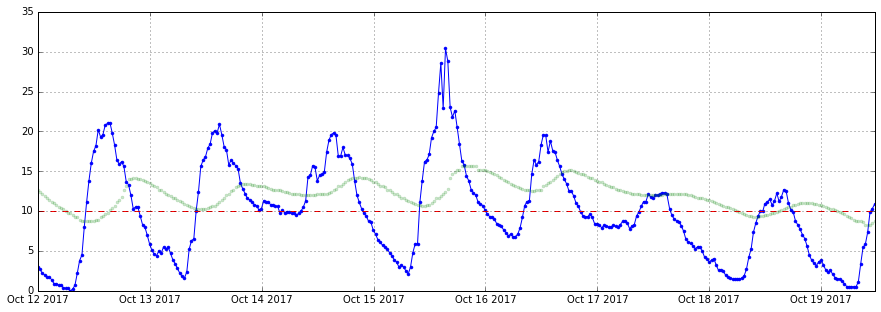

In [14]:
%pylab inline
figure(figsize=(15,5))
N = -360 # ultima semana
#N = -1500 # ultimo mes
#N = 1 # Todos los datos
plot(Dtime[N:],temp[N:],'.', ls='-')
plot(Dtime[N:],intemp[N:],'.',alpha=0.2)
axhline(10, c='r', ls='--', lw=1)
grid()

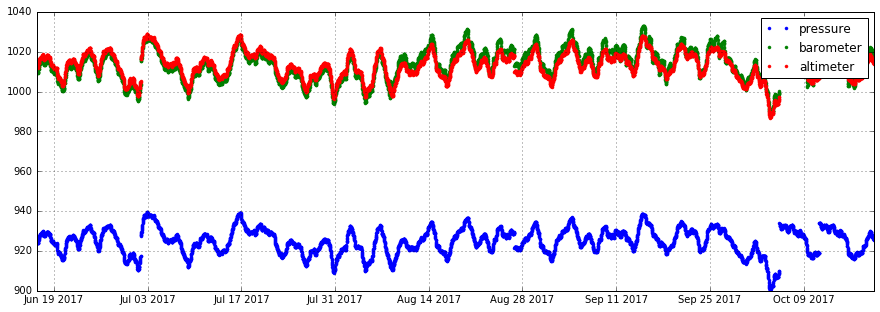

In [15]:
def inHg2mbar(p):
    return p/0.029529983071445

def takeData(colname,conversion='False'):
    c.execute("SELECT {:s} FROM archive".format(colname))
    data = c.fetchall()
    if not conversion:
        conversion=lambda x: x
    return [conversion(item[0]) for item in data]

barometer = takeData('barometer',inHg2mbar)
pressure  = takeData('pressure',inHg2mbar)
altimeter = takeData('altimeter',inHg2mbar)

figure(figsize=(15,5))
plot(Dtime[1:],pressure[1:],'.',label='pressure')
plot(Dtime[1:],barometer[1:],'.',label='barometer')
plot(Dtime[1:],altimeter[1:],'.',label='altimeter')
grid()
legend()